# Implementing KNN Regression
Author: Tony Urschler<br>

### Prompt
Consider a single dimension (variable) X. Obtain N = 100 iid samples x1, x2, ... of X
uniformly randomly between 1 and 10, and then obtain the corresponding y values as the
natural logarithm of x plus a Gaussian noise (mean 0, standard deviation 0.1), with different
points having different amounts of noise. Now use K-NN regression to obtain y^hat values (=
estimates of y) at x-values of 1, 3, 5, 7 and 9 for each of the following schemes:

- the K neighbors contribute equally (separately for K = 1, 3, 50)
- each of the K neighbors has an influence that is inversely proportional to the distance from the point (separately for K = 1, 3, 50)

Print the numerical values of the (x, y^hat) pairs for each of the above cases (there should be a
total of 3 + 3 = 6 cases and 5 (x, y^hat) pairs for each case). Also, plot the (x′, y′) and (x, y^hat)
points for each of these six cases, where x′is the point (out of the 100 sample points) closest
to x and y′is the y-value of x′(there should be a total of 6 plots for this, each plot showing
the (x′, y′) and (x, y^hat) points). It is possible but unlikely that x and x′coincide.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
""" Parameters for data generation """

n = 100
low = 1
high = 10
seed = 13

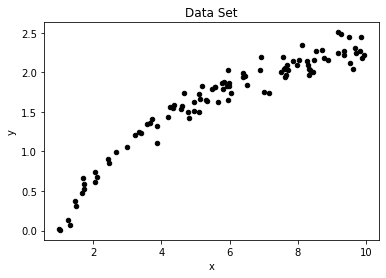

In [3]:
""" Generate X and Y Data """

rng = np.random.default_rng(seed)
pop = pd.DataFrame(rng.uniform(low, high, (n, 1)))
noise = rng.normal(0, .1, (n, 1))
pop[1] = np.log(pop) + noise
pop.columns = ['x', 'y']
fig = pop.plot.scatter(x='x', y='y', c='black', title='Data Set')
plt.show()

<br>

In [4]:
""" Function to Calculate Unweighted KNN Regression """

def unweighted_knn(pop, x, k):
    # find the k-nearest neighbors
    x_dist = np.abs(pop['x'] - x)
    nearest = x_dist.sort_values()[:k]
    # calculate the mean of the k nearest points
    return pop.iloc[nearest.index]['y'].mean()


""" Function to Calculate 1/d Weighted KNN Regression """

def weighted_knn(pop, x, k):
    # find the k-nearest neighbors
    x_dist = np.abs(pop['x'] - x)
    nearest = x_dist.sort_values()[:k]
    # calculate weights
    weights = 1 / nearest
    sum_wgts = np.sum(weights)
    # calculate W tilde and return y_hat
    w_tilde = weights / np.sum(weights)
    return np.sum(pop.iloc[nearest.index]['y'] * w_tilde)

In [5]:
""" K Neighbors Contribute Equally """

# setup dataframe to hold equal cont.
x_test = [1, 3, 5, 7, 9]
equal_test = pd.DataFrame(x_test, columns=['x'])
equal_test['y_hat_0'] = ""
equal_test['y_hat_1'] = ""
equal_test['y_hat_2'] = ""

# for k = 1
for index, row in equal_test.iterrows():
    equal_test.at[index, 'y_hat_0'] = unweighted_knn(pop, row['x'], 1)
    
# for k = 3
for index, row in equal_test.iterrows():
    equal_test.at[index, 'y_hat_1'] = unweighted_knn(pop, row['x'], 3)
    
# for k = 50
for index, row in equal_test.iterrows():
    equal_test.at[index, 'y_hat_2'] = unweighted_knn(pop, row['x'], 50)

In [6]:
""" K Neighbors Weighted (1/d) Contribution """

# setup dataframe to hold inverse cont.
invrs_test = pd.DataFrame(x_test, columns=['x'])
invrs_test['y_hat_0'] = ""
invrs_test['y_hat_1'] = ""
invrs_test['y_hat_2'] = ""

# for k = 1
for index, row in invrs_test.iterrows():
    invrs_test.at[index, 'y_hat_0'] = weighted_knn(pop, row['x'], 1)
    
# for k = 3
for index, row in invrs_test.iterrows():
    invrs_test.at[index, 'y_hat_1'] = weighted_knn(pop, row['x'], 3)
    
# for k = 50
for index, row in invrs_test.iterrows():
    invrs_test.at[index, 'y_hat_2'] = weighted_knn(pop, row['x'], 50)

<br>

### Findings and Plots


K-Nearest Neighbors Equally Contributed
k = 1, k = 3, k = 50
(1, 0.02), (1, 0.05), (1, 1.21)
(3, 1.06), (3, 1.09), (3, 1.21)
(5, 1.63), (5, 1.55), (5, 1.62)
(7, 1.75), (7, 2.0), (7, 1.95)
(9, 2.15), (9, 2.3), (9, 2.1)


K-Nearest Neighbors Weighted (1/d) Contribution
k = 1, k = 3, k = 50
(1, 0.02), (1, 0.02), (1, 0.18)
(3, 1.06), (3, 1.06), (3, 1.08)
(5, 1.63), (5, 1.56), (5, 1.62)
(7, 1.75), (7, 1.77), (7, 1.79)
(9, 2.15), (9, 2.29), (9, 2.2)



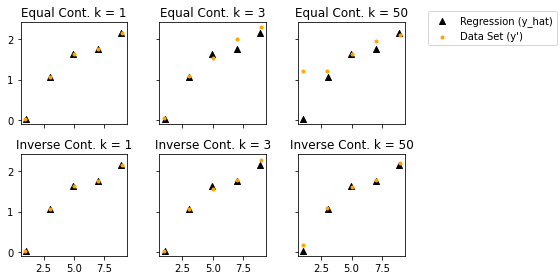

In [7]:
""" 
    Printing All Points 
"""

# printing equal contribution
print("\nK-Nearest Neighbors Equally Contributed")
print("k = 1, k = 3, k = 50")
for index, row in equal_test.iterrows():
    x = equal_test.iloc[index]['x']
    y0 = equal_test.iloc[index]['y_hat_0']
    y1 = equal_test.iloc[index]['y_hat_1']
    y2 = equal_test.iloc[index]['y_hat_2']
    print(f"({x}, {round(y0, 2)}), ({x}, {round(y1, 2)}), ({x}, {round(y2, 2)})")

# printing inverse contribution
print(f"\n\nK-Nearest Neighbors Weighted (1/d) Contribution")
print("k = 1, k = 3, k = 50")
for index, row in invrs_test.iterrows():
    x = invrs_test.iloc[index]['x']
    y0 = invrs_test.iloc[index]['y_hat_0']
    y1 = invrs_test.iloc[index]['y_hat_1']
    y2 = invrs_test.iloc[index]['y_hat_2']
    print(f"({x}, {round(y0, 2)}), ({x}, {round(y1, 2)}), ({x}, {round(y2, 2)})")
print()

# find the closest points from the data set
frames =    [ 
    pop.iloc[np.abs(pop['x'] - 1).sort_values()[:1].index],
    pop.iloc[np.abs(pop['x'] - 3).sort_values()[:1].index],
    pop.iloc[np.abs(pop['x'] - 5).sort_values()[:1].index],
    pop.iloc[np.abs(pop['x'] - 7).sort_values()[:1].index],
    pop.iloc[np.abs(pop['x'] - 9).sort_values()[:1].index]
]
closest = pd.concat(frames)


""" 
    Printing Plots 
"""

# setting up subplots
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

axs[0, 0].scatter(closest['x'], closest['y'], marker="^", color='black')
axs[0, 0].scatter(equal_test['x'], equal_test['y_hat_0'], marker=".", color='orange')
axs[0, 0].set_title("Equal Cont. k = 1")

axs[0, 1].scatter(closest['x'], closest['y'], marker="^", color='black')
axs[0, 1].scatter(equal_test['x'], equal_test['y_hat_1'], marker=".", color='orange')
axs[0, 1].set_title("Equal Cont. k = 3")

axs[0, 2].scatter(closest['x'], closest['y'], marker="^", color='black')
axs[0, 2].scatter(equal_test['x'], equal_test['y_hat_2'], marker=".", color='orange')
axs[0, 2].set_title("Equal Cont. k = 50")

axs[1, 0].scatter(closest['x'], closest['y'], marker="^", color='black')
axs[1, 0].scatter(invrs_test['x'], invrs_test['y_hat_0'], marker=".", color='orange')
axs[1, 0].set_title("Inverse Cont. k = 1")

axs[1, 1].scatter(closest['x'], closest['y'], marker="^", color='black')
axs[1, 1].scatter(invrs_test['x'], invrs_test['y_hat_1'], marker=".", color='orange')
axs[1, 1].set_title("Inverse Cont. k = 3")

axs[1, 2].scatter(closest['x'], closest['y'], marker="^", color='black')
axs[1, 2].scatter(invrs_test['x'], invrs_test['y_hat_2'], marker=".", color='orange')
axs[1, 2].set_title("Inverse Cont. k = 50")

plt.tight_layout()
fig.legend(['Regression (y_hat)', 'Data Set (y\')'], bbox_to_anchor=(1.3,.95))
plt.show()